In [2]:
from sdv import SDV
import pandas as pd
import pyreadstat as prs
import seaborn as sns

In [3]:
pd.options.display.max_columns = None

In [4]:
long = pd.read_spss('../data/uktus15_diary_ep_long.sav')

long_df, long_meta = prs.read_sav('../data/uktus15_diary_ep_long.sav', encoding="latin1")

In [8]:
long_meta.variable_value_labels

{'strata': {-2.0: 'Schedule not applicable'},
 'psu': {-2.0: 'Schedule not applicable'},
 'daynum': {-9.0: 'No answer/refused',
  -8.0: "Don't know",
  -7.0: 'Interview not achieved',
  -2.0: 'Schedule not applicable',
  -1.0: 'Item not applicable'},
 'HhOut': {110.0: 'Productive : Household interview completed, all eligible household members completed individual interviews and diary',
  210.0: 'Productive : At least one individual interview but not from all eligible household members',
  214.0: 'Productive : Household questionnaire completed â\x80\x93 no individual interviews',
  310.0: 'No contact with anyone at address after 6+ calls',
  321.0: 'Contact made at address. but not at selected DU/HH (USE IF MULTIPLE DUs/HHs ONLY)',
  322.0: 'Contact made. but not with responsible resident',
  410.0: 'Office refusal',
  421.0: 'Information refused about number of DUs/HHs at address',
  422.0: 'Information refused about people in household',
  430.0: 'Refusal before household interview',


In [88]:
long.head(3)

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,11011202.0,110.0,117.0,1.0,1.0,Productive : At least one individual interview...,"Individual interview complete, diary collected","Fully productive adult, from part prod HH",December,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,Thursday,0.0,December,2014.0,Mon-Fri,Version 1 Adult (14+ yrs) (with Enjoyment ques...,Now and then during the diary day,Item not applicable,At home,At home,No,2.0,A day off due to the weekend/holiday or work s...,No,2.021182,1.58118,1.0,04:00-04:10,110.0,Sleep,No answer/refused,No answer/refused,No answer/refused,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Reported,Not reported,Co-presence reported,main act: work/edu/sleep,very much,not missing
1,11011202.0,110.0,117.0,1.0,1.0,Productive : At least one individual interview...,"Individual interview complete, diary collected","Fully productive adult, from part prod HH",December,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,Thursday,0.0,December,2014.0,Mon-Fri,Version 1 Adult (14+ yrs) (with Enjoyment ques...,Now and then during the diary day,Item not applicable,At home,At home,No,2.0,A day off due to the weekend/holiday or work s...,No,2.021182,1.58118,2.0,05:50-06:00,10.0,Other specified TV watching,Sleep: In bed not asleep,No answer/refused,No answer/refused,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Reported,Not reported,Co-presence reported,Not reported,very much,not missing
2,11011202.0,110.0,117.0,1.0,1.0,Productive : At least one individual interview...,"Individual interview complete, diary collected","Fully productive adult, from part prod HH",December,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,Thursday,0.0,December,2014.0,Mon-Fri,Version 1 Adult (14+ yrs) (with Enjoyment ques...,Now and then during the diary day,Item not applicable,At home,At home,No,2.0,A day off due to the weekend/holiday or work s...,No,2.021182,1.58118,3.0,06:00-06:10,10.0,Other personal care: Wash and dress,No answer/refused,No answer/refused,No answer/refused,Home,not using device,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,No co-presence reported,Not reported,3.0,not missing


In [89]:
long['IndOut'].value_counts()

Individual interview complete, diary collected        586081
Individual interview not complete, diary collected      1551
Name: IndOut, dtype: int64

In [90]:
long_df.head(3)

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,11011202.0,110.0,117.0,1.0,1.0,210.0,11.0,2.0,12.0,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,5.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.021182,1.58118,1.0,1.0,110.0,110.0,-9.0,-9.0,-9.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,1.0
1,11011202.0,110.0,117.0,1.0,1.0,210.0,11.0,2.0,12.0,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,5.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.021182,1.58118,2.0,12.0,10.0,8219.0,111.0,-9.0,-9.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1.0
2,11011202.0,110.0,117.0,1.0,1.0,210.0,11.0,2.0,12.0,2014.0,48.0,1.0,1.363764e+10,1.363764e+10,5.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.021182,1.58118,3.0,13.0,10.0,310.0,-9.0,-9.0,-9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0


In [91]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587632 entries, 0 to 587631
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serial           587632 non-null  float64
 1   strata           587632 non-null  float64
 2   psu              587632 non-null  float64
 3   pnum             587632 non-null  float64
 4   daynum           587632 non-null  float64
 5   HhOut            587632 non-null  float64
 6   IndOut           587632 non-null  float64
 7   DMFlag           587632 non-null  float64
 8   IMonth           587632 non-null  float64
 9   IYear            587632 non-null  float64
 10  DVAge            587632 non-null  float64
 11  DayNum_DiaryDay  587632 non-null  float64
 12  DPday            587100 non-null  float64
 13  DiaryDate_Act    587457 non-null  float64
 14  DiaryDay_Act     587632 non-null  float64
 15  DiaryDateDiff    587632 non-null  float64
 16  dmonth           587632 non-null  floa

In [92]:
data_enc = pd.read_csv('../data/long_encoded.csv')

In [3]:
long_df = pd.read_csv('../data/Iris.csv')
long_df['Species'] = long_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
# y = np.array(long_df['Species'])
# print(y)
# y = tf.keras.utils.to_categorical(y, dtype ="uint8")
long_df = long_df[['SepalLengthCm',  'SepalWidthCm',  'PetalLengthCm',  'PetalWidthCm',  'Species']]

In [93]:
data_enc.head(3)

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,0,21,10,162,73,52,22,1,1,0,1,0,0,0,1,0,0,1,8,6
1,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,1,32,0,83,158,52,22,1,1,0,1,0,0,0,1,0,0,0,8,6
2,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,2,33,0,82,73,52,22,1,1,0,0,0,0,0,0,0,1,0,1,6


In [5]:
from sdv import Metadata

def data_gen(data):
    metadata = Metadata()
    table = {'long': data}
    metadata.add_table(
        name = 'long',
        data = table['long']
    )
    sdv = SDV()
    sdv.fit(metadata, table)
    sdv.save('../models/idc.pkl')
    sdv = SDV.load('../models/idc.pkl')
    samples = sdv.sample()
    return samples

In [6]:
long_gen = data_gen(long)
# data_enc_gen = data_gen(data_enc)

TypeError: Cannot interpret 'CategoricalDtype(categories=[                                                                              4276.0,
                                      'Accompanying a dependent adult household member e.g. Alzheimic',
                                'Accompanying a non-dependent adult household member e.g. to hospital',
                                                  'Accompanying an adult as help to another household',
                                                                                  'Accompanying child',
                                                                   'Accompanying non-coresident child',
                                                               'Accompanying own non-coresident child',
                                 'Activities related to employment: Activities related to job seeking',
                                                       'Activities related to employment: Lunch break',
                  'Activities related to employment: Other specified activities related to employment',
                  ...
                                                              'Volunteer work through an organisation',
                                                                                  'Walking and hiking',
                                                                                     'Walking the dog',
                                                                               'Watching a film on TV',
                                                                            'Watching a film on video',
                                                                                'Watching sport on TV',
                                                                             'Watching sport on video',
                                                        'Window shopping or other shopping as leisure',
                                                          'Woodcraft metalcraft sculpture and pottery',
                                                                            'Work for an organisation'],
, ordered=False)' as a data type

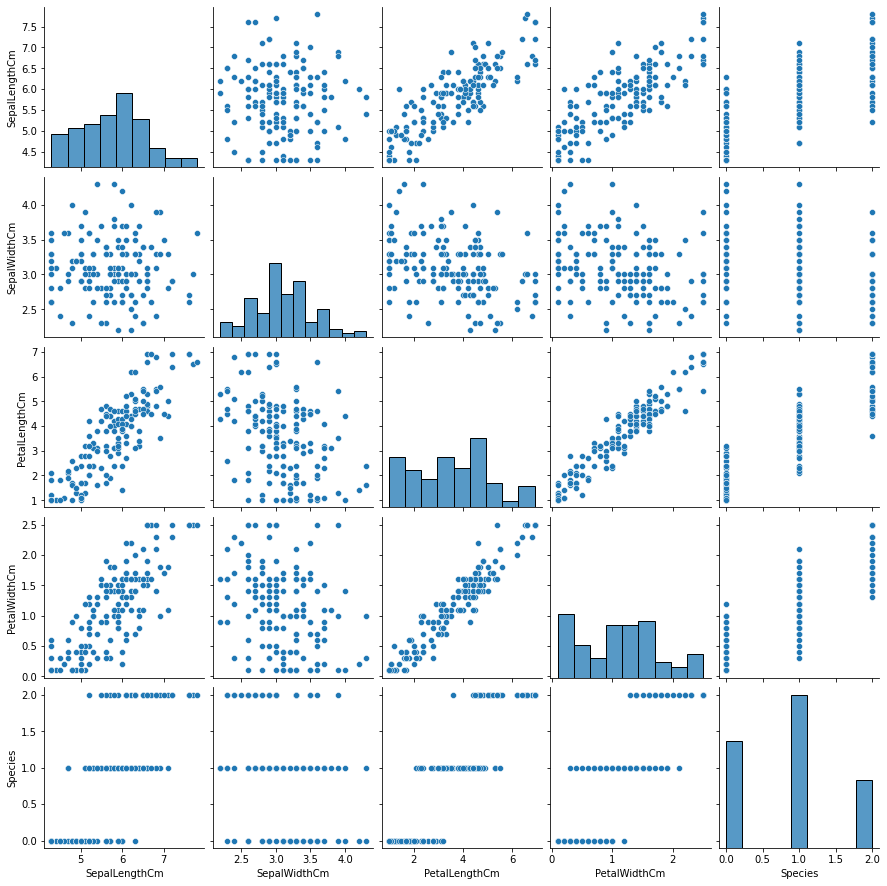

In [9]:
sns.pairplot(long_gen['long'])

In [96]:
samples['long'].shape

(587632, 50)

In [97]:
samples['long'].head()

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,1460,111,265,3,0,2,0,1,4,1,0,0,302,308,4,25,4,1,1,1,2,22,0,0,1,0,1,1,8712,5042,0,98,0,63,179,83,23,7,1,0,0,1,1,0,0,1,0,0,4,6
1,2713,257,303,0,1,2,0,0,8,0,53,1,90,88,6,25,7,0,0,0,4,20,0,0,0,0,7,0,15881,7188,22,117,4,138,46,46,25,35,1,1,0,0,0,0,0,0,0,0,3,5
2,3299,209,392,0,0,2,0,0,3,0,37,0,180,190,2,21,3,0,2,0,4,20,0,0,0,0,5,0,89,1438,15,29,0,95,103,52,22,0,1,1,0,0,0,0,0,0,1,0,7,6
3,2951,140,346,1,1,2,0,0,6,1,22,1,331,335,2,24,8,1,2,1,3,18,0,0,1,0,5,0,6762,7552,35,119,0,104,111,45,24,6,1,0,1,0,0,0,0,0,0,0,6,5
4,2651,152,290,0,1,2,0,0,4,0,53,1,230,224,1,32,5,0,2,0,1,19,0,0,0,0,4,0,0,1302,21,93,9,57,111,57,22,0,1,0,1,0,0,0,0,0,0,0,6,6


In [98]:
data_enc.head()

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,0,21,10,162,73,52,22,1,1,0,1,0,0,0,1,0,0,1,8,6
1,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,1,32,0,83,158,52,22,1,1,0,1,0,0,0,1,0,0,0,8,6
2,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,2,33,0,82,73,52,22,1,1,0,0,0,0,0,0,0,1,0,1,6
3,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,3,34,0,24,73,52,22,1,1,0,0,0,0,0,0,0,1,0,1,6
4,0,9,15,0,0,1,0,1,2,0,38,0,254,254,4,26,2,0,0,0,3,21,0,0,0,1,0,0,14771,7173,4,35,0,42,73,52,22,1,2,0,0,0,0,0,0,0,1,0,3,6


In [99]:
data_enc['IndOut'].value_counts()

0    586081
1      1551
Name: IndOut, dtype: int64

In [100]:
samples['long'].head()

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,1460,111,265,3,0,2,0,1,4,1,0,0,302,308,4,25,4,1,1,1,2,22,0,0,1,0,1,1,8712,5042,0,98,0,63,179,83,23,7,1,0,0,1,1,0,0,1,0,0,4,6
1,2713,257,303,0,1,2,0,0,8,0,53,1,90,88,6,25,7,0,0,0,4,20,0,0,0,0,7,0,15881,7188,22,117,4,138,46,46,25,35,1,1,0,0,0,0,0,0,0,0,3,5
2,3299,209,392,0,0,2,0,0,3,0,37,0,180,190,2,21,3,0,2,0,4,20,0,0,0,0,5,0,89,1438,15,29,0,95,103,52,22,0,1,1,0,0,0,0,0,0,1,0,7,6
3,2951,140,346,1,1,2,0,0,6,1,22,1,331,335,2,24,8,1,2,1,3,18,0,0,1,0,5,0,6762,7552,35,119,0,104,111,45,24,6,1,0,1,0,0,0,0,0,0,0,6,5
4,2651,152,290,0,1,2,0,0,4,0,53,1,230,224,1,32,5,0,2,0,1,19,0,0,0,0,4,0,0,1302,21,93,9,57,111,57,22,0,1,0,1,0,0,0,0,0,0,0,6,6


In [101]:
samples['long']['IndOut'].value_counts()

0    587632
Name: IndOut, dtype: int64

In [102]:
sns.set(rc={"figure.figsize":(10, 8)}) #width=3, #height=4

In [ ]:
long_gen['long'].head()

In [ ]:
long_gen['long'].shape

<AxesSubplot:>

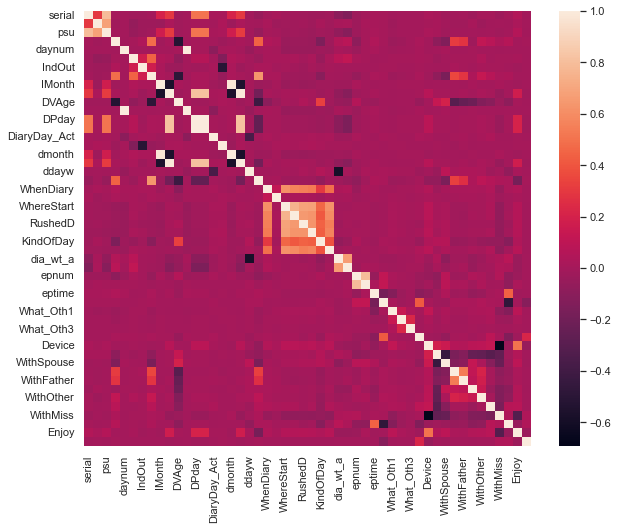

In [103]:
sns.heatmap(long_df.corr())

<AxesSubplot:>

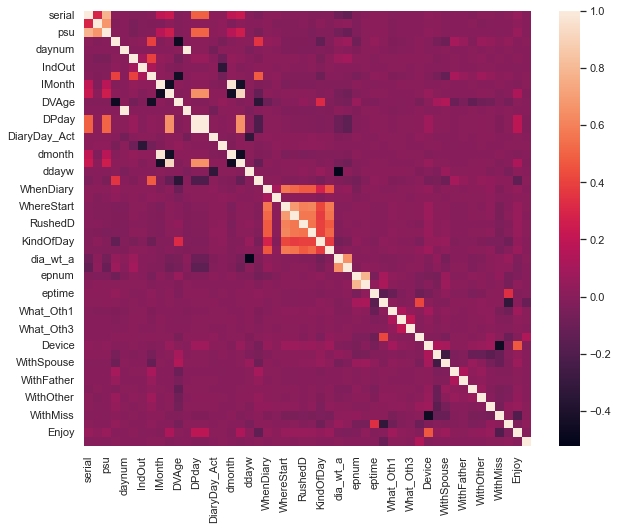

In [104]:
# data_enc synth
sns.heatmap(long_gen['long'].corr())

<AxesSubplot:>

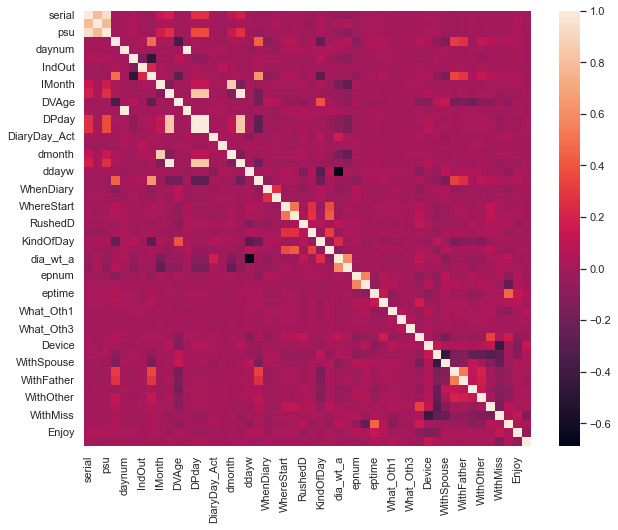

In [83]:
sns.heatmap(data_enc.corr())

<AxesSubplot:>

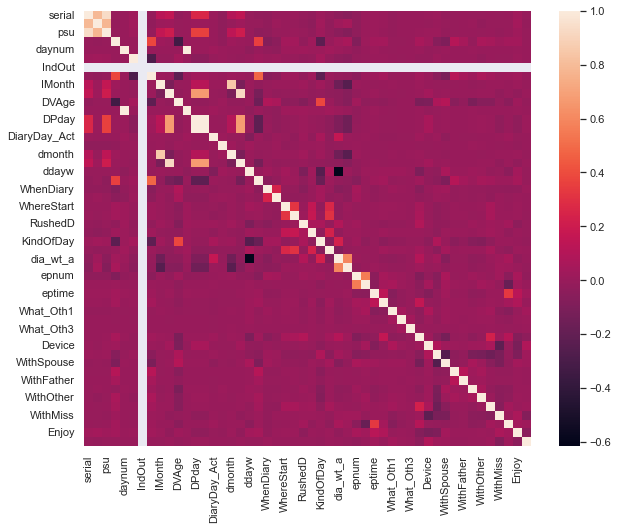

In [107]:
sns.heatmap(data_enc_gen['long'].corr())

<AxesSubplot:>

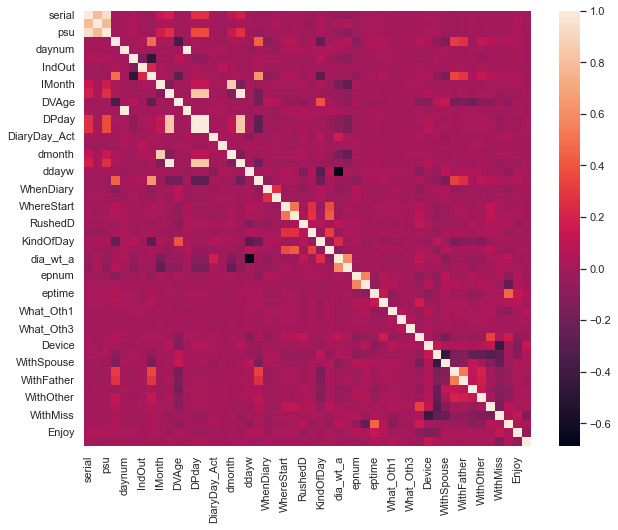

In [108]:
sns.heatmap(data_enc.corr())

In [109]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587632 entries, 0 to 587631
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   serial           587632 non-null  int64
 1   strata           587632 non-null  int64
 2   psu              587632 non-null  int64
 3   pnum             587632 non-null  int64
 4   daynum           587632 non-null  int64
 5   HhOut            587632 non-null  int64
 6   IndOut           587632 non-null  int64
 7   DMFlag           587632 non-null  int64
 8   IMonth           587632 non-null  int64
 9   IYear            587632 non-null  int64
 10  DVAge            587632 non-null  int64
 11  DayNum_DiaryDay  587632 non-null  int64
 12  DPday            587632 non-null  int64
 13  DiaryDate_Act    587632 non-null  int64
 14  DiaryDay_Act     587632 non-null  int64
 15  DiaryDateDiff    587632 non-null  int64
 16  dmonth           587632 non-null  int64
 17  dyear            587632 non-n

In [110]:
data_enc.corr()

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
serial,1.000000,0.792095,0.938021,-0.003539,-0.000599,0.046699,-0.022574,-0.020026,0.124697,0.190712,-0.019044,-0.000599,0.264667,0.266073,0.003153,-0.034630,0.104081,0.189060,-0.007843,-0.025274,-0.028030,0.002617,-0.001684,0.006356,-0.013364,-0.030364,0.016438,-0.016494,-0.041821,-0.055434,-0.031624,0.005320,0.016815,0.007508,-0.009806,-0.001840,-0.000456,0.003746,0.010082,0.015046,-0.020603,-0.014193,-0.009974,-0.004373,-0.011175,0.001399,-0.009650,0.000225,0.034071,-0.005209
strata,0.792095,1.000000,0.781182,-0.013022,-0.000653,0.049675,-0.014090,-0.030640,0.013463,0.022773,-0.009649,-0.000653,0.008974,0.008380,-0.000365,-0.033536,-0.006681,0.022713,-0.002712,-0.005179,-0.027339,0.013429,-0.000312,-0.005492,-0.022896,-0.045158,0.033605,-0.029716,0.027179,0.050695,-0.029170,0.009801,0.015576,0.010425,-0.008609,-0.002954,-0.001796,-0.001740,-0.005977,0.010683,-0.008906,-0.015901,-0.013666,0.010889,-0.027445,-0.006639,-0.003432,-0.004610,0.045680,-0.011609
psu,0.938021,0.781182,1.000000,-0.002260,-0.001155,0.044937,-0.017813,-0.019764,0.163861,0.259127,-0.010292,-0.001155,0.367169,0.367691,-0.001281,-0.034283,0.141880,0.257199,-0.008264,-0.043634,-0.030968,-0.002435,0.004111,0.007218,-0.009125,-0.029471,0.019384,-0.019172,-0.054336,-0.080085,-0.031073,0.005690,0.017320,0.006456,-0.009531,-0.002461,0.000601,0.003916,0.014839,0.014417,-0.015183,-0.012334,-0.008799,0.000434,-0.010551,-0.000064,-0.013996,-0.002013,0.029649,-0.001729
pnum,-0.003539,-0.013022,-0.002260,1.000000,-0.005219,-0.003510,0.039876,0.483116,0.020597,0.011148,-0.372611,-0.005219,0.008300,0.004455,0.000308,-0.030373,0.025002,0.011421,0.001017,0.443566,-0.089289,-0.052686,0.058408,0.052920,-0.029914,0.028131,-0.259886,-0.001458,0.036767,0.063717,-0.089481,0.011629,0.046372,0.054998,-0.007242,-0.006640,0.001108,0.063396,0.035269,-0.083335,-0.138344,0.308961,0.273553,-0.019383,0.112897,0.078322,0.029719,0.062450,0.036668,-0.002783
daynum,-0.000599,-0.000653,-0.001155,-0.005219,1.000000,0.003359,0.000994,-0.006010,0.001498,-0.001542,0.004369,1.000000,0.008621,0.008343,0.036999,0.006302,-0.000118,-0.000287,-0.045261,-0.003325,-0.020802,-0.037880,0.034635,0.035273,0.031370,0.022284,0.020452,0.043360,0.021684,-0.000486,-0.033096,0.004040,0.019703,0.006402,-0.005210,-0.003272,-0.003039,0.005020,-0.016009,-0.003968,0.012377,-0.000108,-0.003207,0.006396,0.000414,0.001830,-0.005068,-0.000509,0.007210,0.001824
HhOut,0.046699,0.049675,0.044937,-0.003510,0.003359,1.000000,-0.146418,-0.480777,-0.018880,-0.028004,0.071174,0.003359,-0.079047,-0.073106,-0.005978,0.004565,-0.010620,-0.027013,0.002963,0.035136,0.014150,0.021475,0.001606,-0.002374,-0.033052,-0.022356,0.074595,-0.019158,-0.059939,-0.082919,-0.019573,-0.004764,0.008519,0.004935,0.005128,-0.004585,-0.005095,-0.015901,-0.026704,0.019428,0.002405,-0.007844,-0.008939,-0.005087,-0.040244,-0.001501,-0.006652,-0.005815,0.017999,-0.005172
IndOut,-0.022574,-0.014090,-0.017813,0.039876,0.000994,-0.146418,1.000000,0.220209,0.020875,-0.024180,-0.018308,0.000994,0.029060,-0.009573,-0.010037,0.094551,0.021763,-0.024544,-0.001670,0.020244,-0.017580,-0.017833,0.002497,0.009503,0.003432,0.002744,-0.026676,0.002544,0.002826,0.000090,-0.001815,0.002058,0.001583,0.002236,0.005453,0.000570,-0.000447,0.010554,0.001371,-0.007906,-0.005534,0.020391,0.007010,-0.003883,0.013450,0.007592,0.002676,0.000490,0.003937,-0.001978
DMFlag,-0.020026,-0.030640,-0.019764,0.483116,-0.006010,-0.480777,0.220209,1.000000,0.016719,0.006189,-0.274021,-0.006010,0.036118,0.027108,0.009026,0.002768,0.020340,0.005372,-0.008435,0.63674